# CM4 'vo' Plot in Solomon Sea
*Akira Di Sandro, 6/12/20*
<br>
Upon initial plot on first_plot.ipynb, I want to take a cross-section of the Solomon Sea with respect to latitude and plot 'vo' in a range of longitudes.

## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import xarray as xr
xr.set_options(display_style='html')
import intake
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

## 2. Load CMIP6 Data to find CM4 Dataset

In [3]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)

In [4]:
dog = col.search(source_id='GFDL-CM4', experiment_id='historical', table_id='Omon', variable_id=['uo','vo','wo'], grid_label='gn')

In [5]:
dset_dict = dog.to_dataset_dict(zarr_kwargs={'consolidated': True})
list(dset_dict.keys())

Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:03<00:00,  3.78s/it]


['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']

In [6]:
CM4_hist = dset_dict['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']
CM4_hist

<xarray.Dataset>
Dimensions:    (bnds: 2, lev: 35, member_id: 1, time: 1980, x: 1440, y: 1080)
Coordinates:
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lon        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
    lat        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * bnds       (bnds) float64 1.0 2.0
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * member_id  (member_id) <U8 'r1i1p1f1'
Data variables:
    uo         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 35, 1080, 1440), meta=np.ndarray>
    vo         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 35, 1080, 1440), meta=np.ndarray>
Attributes:
    data_specs_version:      01.00.27
    branch_time_in_parent:   36500.0
    forcing_index:           1
    experiment_id:           historical
    parent_time_units:       days since 0001-1-1
    sub_experiment_id:       none
    status:                  2019-08-06;created;by nhn2@columbia.edu
    contact:                 gfdl.climate.model.info@noaa.gov
    sub_experiment:          none
    variant_info:            N/A
    parent_activity_id:      CMIP
    source_id:               GFDL-CM4
    variant_label:           r1i1p1f1
    parent_source_id:        GFDL-CM4
    parent_experiment_id:    piControl
    institution:             National Oceanic and Atmospheric Administration,...
    experiment:              historical
    history:                 File was processed by fremetar (GFDL analog of C...
    branch_method:           standard
    frequency:               mon
    institution_id:          NOAA-GFDL
    license:                 CMIP6 model data produced by NOAA-GFDL is licens...
    nominal_resolution:      25 km
    product:                 model-output
    parent_mip_era:          CMIP6
    grid:                    ocean data on native grid tripolar - nominal 0.2...
    realm:                   ocean
    references:              see further_info_url attribute
    mip_era:                 CMIP6
    parent_variant_label:    r1i1p1f1
    activity_id:             CMIP
    grid_label:              gn
    Conventions:             CF-1.7 CMIP-6.0 UGRID-1.0
    realization_index:       1
    branch_time_in_child:    0.0
    source:                  GFDL-CM4 (2018): \naerosol: interactive\natmos: ...
    source_type:             AOGCM
    physics_index:           1
    title:                   NOAA GFDL GFDL-CM4 model output prepared for CMI...
    initialization_index:    1
    tracking_id:             hdl:21.14100/d0ebcd36-d2cd-442e-a8d9-8f7a27168a2...
    table_id:                Omon
    comment:                 <null ref>
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.G...
    intake_esm_dataset_key:  CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn

## 3. Specify Parameters
In this notebook, I want to look at across section of the Solomon Sea, so I will first plot a surface map to look at the coordinates I will need.

I will also need a Dask Cluster so here is the set-up:

In [7]:
from dask.distributed import Client
from dask_gateway import Gateway


gateway = Gateway()  # connect to Gateway

cluster = gateway.new_cluster()  # create cluster
cluster.scale(10)  # scale cluster

client = Client(cluster)  # connect Client to Cluster

In [8]:
client

Client Scheduler: gateway://traefik-ocean-prod-dask-gateway.ocean-prod:80/ocean-prod.2fce03f9fd2e405583aa38e8ced7b850 Dashboard: https://ocean.pangeo.io/services/dask-gateway/clusters/ocean-prod.2fce03f9fd2e405583aa38e8ced7b850/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [9]:
surf_map = CM4_hist['uo'].sel(lev=2.5, time=CM4_hist.time[0])
surf_map

<xarray.DataArray 'uo' (member_id: 1, y: 1080, x: 1440)>
dask.array<getitem, shape=(1, 1080, 1440), dtype=float32, chunksize=(1, 1080, 1440), chunktype=numpy.ndarray>
Coordinates:
    lon        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    lat        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
    lev        float64 2.5
    time       object 1850-01-16 12:00:00
  * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * member_id  (member_id) <U8 'r1i1p1f1'
Attributes:
    cell_methods:   time: mean
    interp_method:  none
    long_name:      Sea Water X Velocity
    original_name:  uo
    standard_name:  sea_water_x_velocity
    units:          m s-1

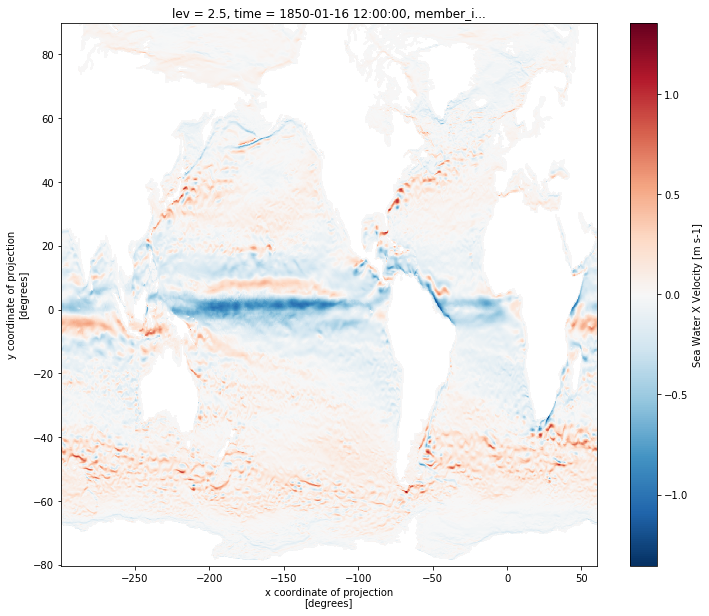

In [10]:
plt.figure(figsize=[12, 10])
surf_map.plot()

### a. Taking a closer look at the surface field map
I want to narrow this down to get a close look at the area around the Solomon Sea.

In [11]:
sol_map = CM4_hist['uo'].sel(lev=2.5, time=CM4_hist.time[0]).sel(y=slice(-12.0,-2.0)).sel(x=slice(-215,-200))
sol_map

<xarray.DataArray 'uo' (member_id: 1, y: 40, x: 61)>
dask.array<getitem, shape=(1, 40, 61), dtype=float32, chunksize=(1, 40, 61), chunktype=numpy.ndarray>
Coordinates:
    lon        (y, x) float32 dask.array<chunksize=(40, 61), meta=np.ndarray>
    lat        (y, x) float32 dask.array<chunksize=(40, 61), meta=np.ndarray>
  * y          (y) float64 -11.91 -11.67 -11.42 -11.18 ... -2.749 -2.499 -2.249
    lev        float64 2.5
    time       object 1850-01-16 12:00:00
  * x          (x) float64 -214.9 -214.7 -214.4 -214.2 ... -200.5 -200.3 -200.0
  * member_id  (member_id) <U8 'r1i1p1f1'
Attributes:
    cell_methods:   time: mean
    interp_method:  none
    long_name:      Sea Water X Velocity
    original_name:  uo
    standard_name:  sea_water_x_velocity
    units:          m s-1

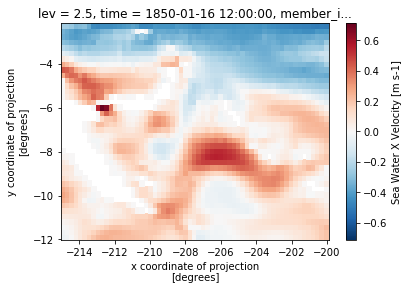

In [12]:
sol_map.plot()

* This is an attempt at changing the land colors to something other than white

* Actually, I just realized that for now I can just change the color of the map so that the middle value is a color other than white

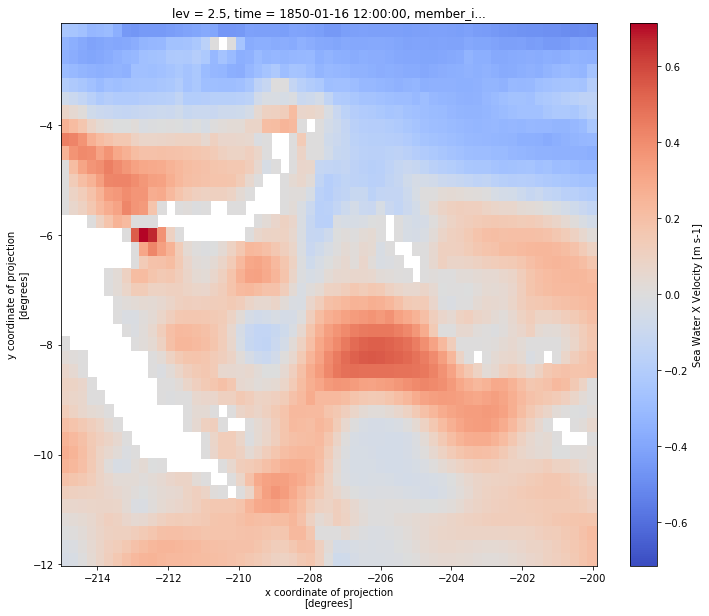

In [13]:
plt.figure(figsize=[12, 10])
sol_map.plot(cmap='coolwarm')

* From this, it looks like red, or positive values of u-velocity is velocity in the westward direction while blue, or negative values of u-velocity is velocity in the eastward direction

### b. Parameterizing the cross section I want
Here is where I actually assign the cross section. 

In [17]:
#horizontal cross-section across the Sol Sea
horz_cross = CM4_hist['vo'].sel(time='2012').mean(dim='time').sel(y=-8, method='nearest').sel(x=slice(-215,-200))
horz_cross

<xarray.DataArray 'vo' (member_id: 1, lev: 35, x: 61)>
dask.array<getitem, shape=(1, 35, 61), dtype=float32, chunksize=(1, 35, 61), chunktype=numpy.ndarray>
Coordinates:
    lon        (x) float32 dask.array<chunksize=(61,), meta=np.ndarray>
    lat        (x) float32 dask.array<chunksize=(61,), meta=np.ndarray>
    y          float64 -7.974
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * x          (x) float64 -214.9 -214.7 -214.4 -214.2 ... -200.5 -200.3 -200.0
  * member_id  (member_id) <U8 'r1i1p1f1'

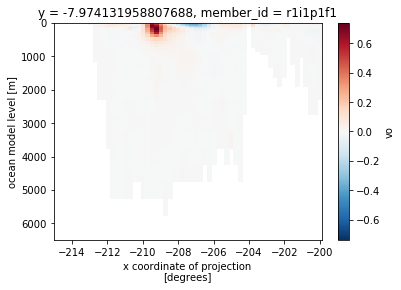

In [22]:
horz_cross.plot(ylim=(6500,0))

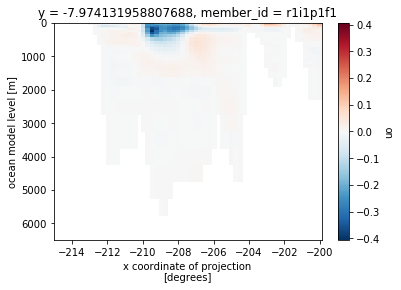

In [21]:
horz_cross_uo = CM4_hist['uo'].sel(time='2012').mean(dim='time').sel(y=-8, method='nearest').sel(x=slice(-215,-200))
horz_cross_uo
horz_cross_uo.plot(ylim=(6500,0))

### Closing the Cluster
Make sure to **ALWAYS** close the cluster and client, so I'm not wasting processing tools on simple calculations and tasks.

In [24]:
client.close()
cluster.close()